In this notebook, I want to predict the onset of diabetes based on diagnostic measures by developing a **Logistic Regression Classification** model. 

In [1]:
%run "functions.ipynb"

**Pima Indians Diabetes Database**
- Data Source: Kaggle

In [2]:
filename = 'diabetes.csv'
dataframe = pd.read_csv(filename)
print('This dataframe has {} rows and {} columns'.format(dataframe.shape[0], dataframe.shape[1]))

This dataframe has 768 rows and 9 columns


In [3]:
dataframe.info()
dataframe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataframe.rename(columns={'DiabetesPedigreeFunction':'PedigreeFun'}, inplace=True)

Sanity check for missing values

In [5]:
dataframe.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
PedigreeFun      0
Age              0
Outcome          0
dtype: int64

************
Summary statistics for numerical variables

In [6]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFun,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


According to the above table, the minimum value of "Glucose","BloodPressure","SkinThickness","Insulin", and "BMI" columns is 0 which does not make sense. The 0 values will be replaced with NaN (e.g. missing values) and then will be filled with an appropriate value.

In [7]:
len(dataframe[dataframe['Insulin']==0])

374

In [8]:
selected_columns = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

def replace_min(x):
    if x == 0:
        x = np.nan
    return x

for column in selected_columns:
    dataframe[column] = dataframe[column].apply(lambda x: replace_min(x))
    
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFun,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
dataframe.isnull().sum()

Pregnancies        0
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
PedigreeFun        0
Age                0
Outcome            0
dtype: int64

***
Checking the distribution of features with missing values

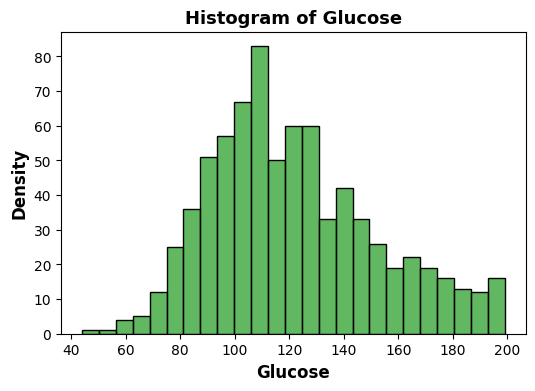

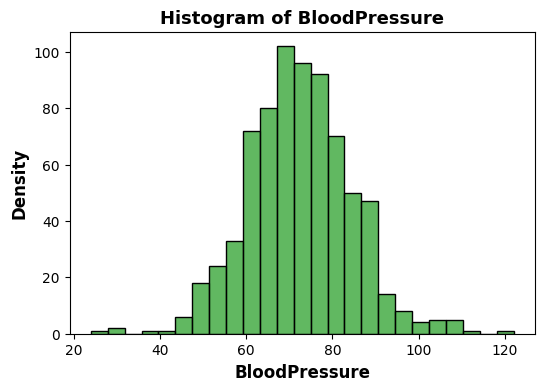

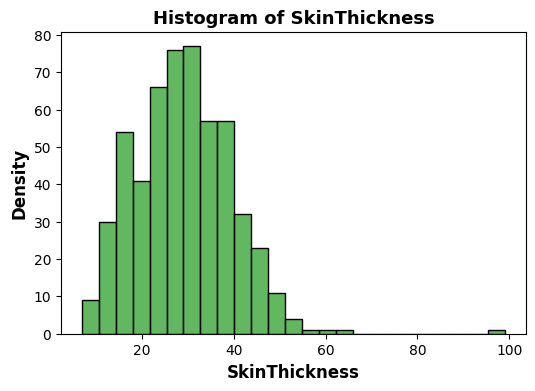

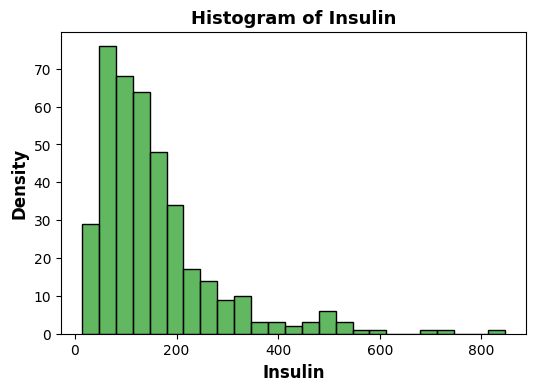

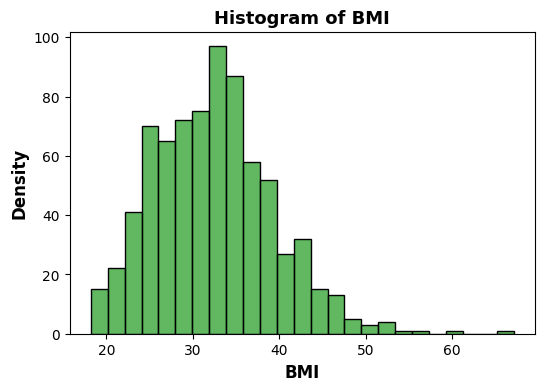

In [10]:
for column in selected_columns:
    plot_distribution(column)

In [11]:
# normal distribution
norm_features = ['Glucose', 'BloodPressure', 'BMI']

# skewed distribution
skewed_features = ['SkinThickness', 'Insulin']

The missing values will be replaced later, after splitting the data into train & test sets.

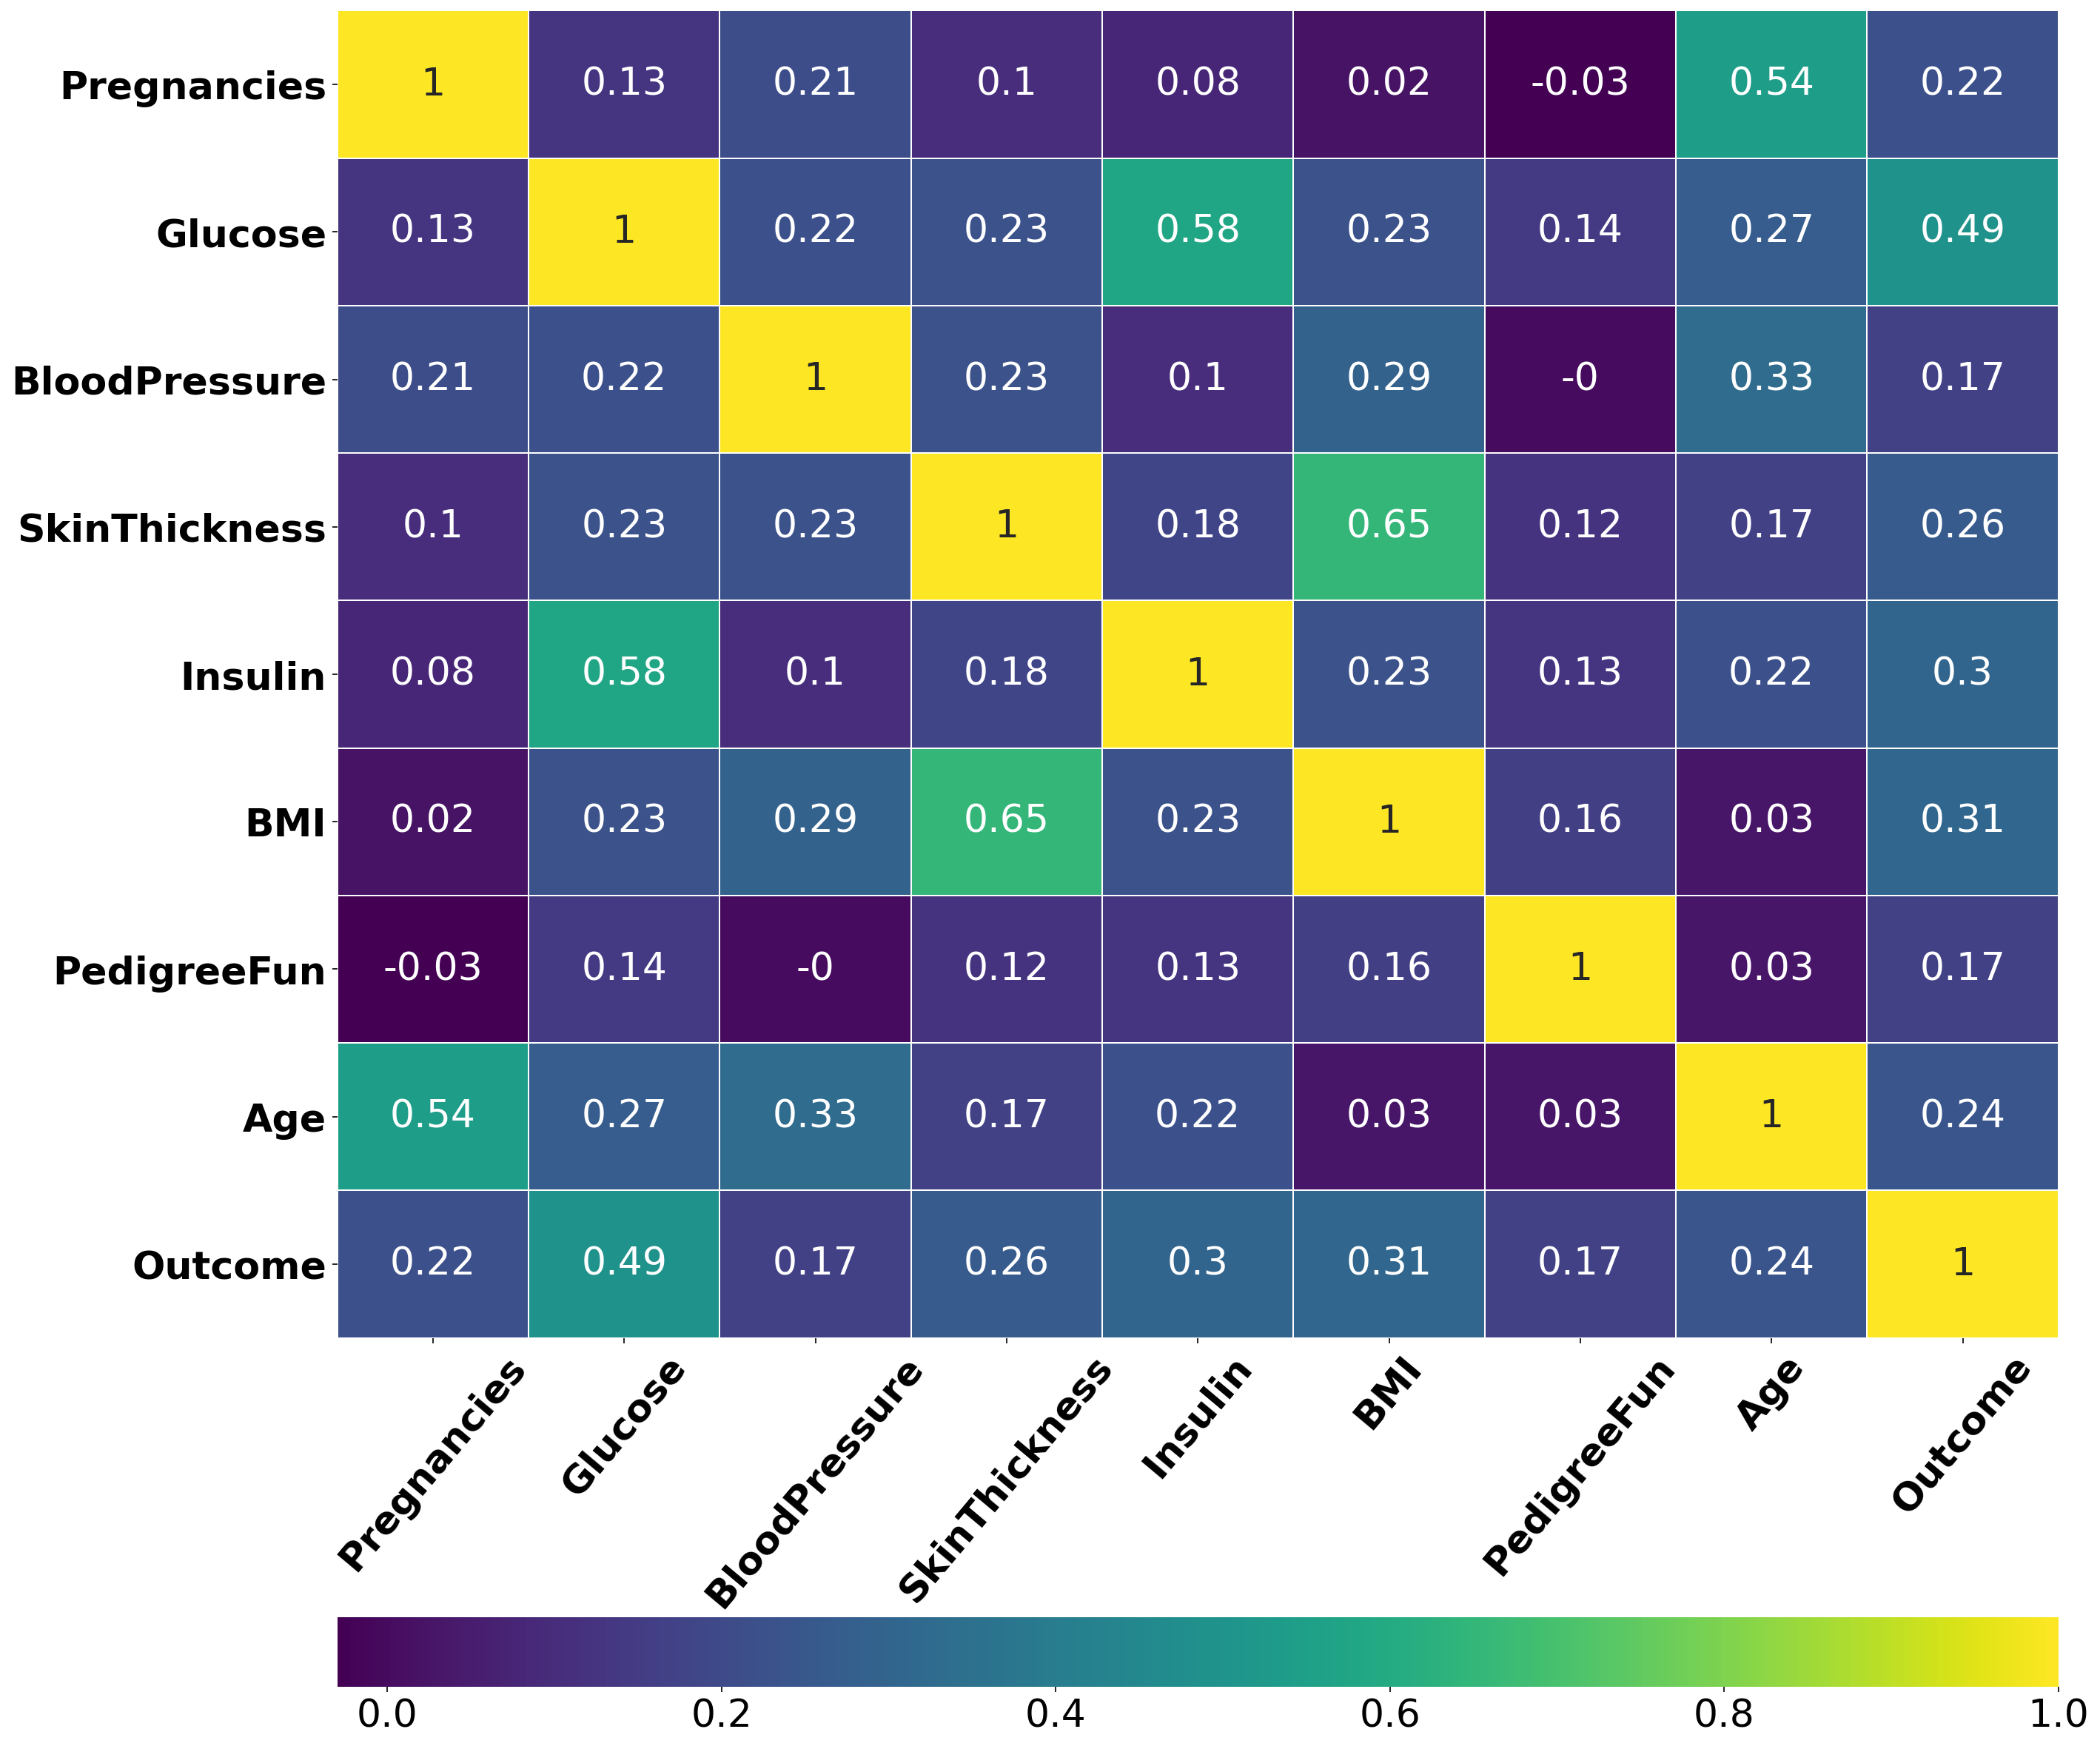

In [12]:
plot_heat_map(dataframe)

According to the heatmap plot, there is no strong collinearity among the features.
***
Separating dependent (y: target variable) and independent variables (X)

In [13]:
X,y = Set_X_y(dataframe, 'Outcome')

Preparing training and test data sets 

In [14]:
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

Replacing missing values with appropriate values

In [15]:
X_train = X_train.copy()
X_train = replace_missing(X_train, norm_features, 'mean')
X_train = replace_missing(X_train, skewed_features, 'median')
X_train.isnull().sum()

Pregnancies      0
PedigreeFun      0
Age              0
Glucose          0
BloodPressure    0
BMI              0
SkinThickness    0
Insulin          0
dtype: int64

In [16]:
X_test = X_test.copy()
X_test = replace_missing(X_test, norm_features, 'mean')
X_test = replace_missing(X_test, skewed_features, 'median')
X_test.isnull().sum()

Pregnancies      0
PedigreeFun      0
Age              0
Glucose          0
BloodPressure    0
BMI              0
SkinThickness    0
Insulin          0
dtype: int64

Checking classes balance

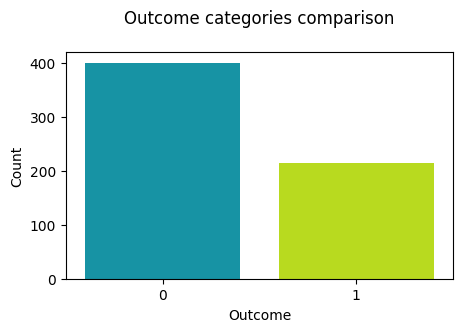

In [17]:
plt.figure(figsize = (5, 3), dpi=100)
sns.countplot(x = y_train, alpha = 1, palette="nipy_spectral")
plt.xlabel('Outcome', size = 10)
plt.ylabel('Count', size = 10)
plt.title('Outcome categories comparison\n');

In [18]:
print('1:0 ratio is {}'.format(round(y_train.value_counts()[1]/y_train.value_counts()[0],2)))

1:0 ratio is 0.54


According to the above ratio, the training dataset is slightly imbalance but does **not** raise a concern.
**Slight Imbalance** is an imbalanced classification problem where the distribution of examples is uneven by a small amount in the training dataset (e.g. 4:6 or 0.67).
(Source: https://machinelearningmastery.com/what-is-imbalanced-classification/)

### Model Development
An important note about choosing the right metric to evaluate the model perfromance: It is safer to mistakenly diagnose patients with diabetes (while they are not a true patient) rather than not diagnosing a true patient and then not treating them. In this regard, maximizing **Recall** helps in minimizing **Type II error (false negatives)** and the true patients who were missed out. Thus, in the following, I will focus on maximizing the recall. 

Performing K-Fold cross-validation to estimate the accuracy

In [19]:
model = LogisticRegression(max_iter=300, C=0.01, random_state=random_state)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="recall")

print("{} Recall with {} standard deviation".format(round(results.mean(),2), round(results.std(),2)))

0.58 Recall with 0.02 standard deviation


In [20]:
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
train_score = metrics.recall_score(y_train, train_pred)

test_pred = model.predict(X_test)
test_score = metrics.recall_score(y_test, test_pred) 

print("Training set Recall: {}, Test set Recall: {}".format(round(train_score,2), round(test_score,2)))

Training set Recall: 0.58, Test set Recall: 0.54


#### Model Performance on the Training Set

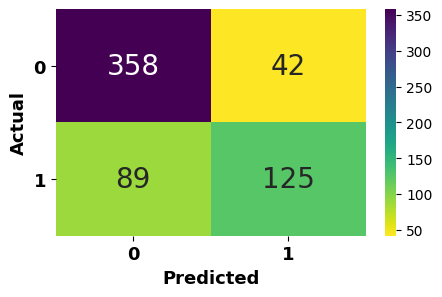

In [21]:
plot_confusion_matrix(y_train, train_pred)

In [22]:
classification_metrics(y_train, train_pred)

,Accuracy,Recall,Precision,F-score
0,0.7866,0.5841,0.7485,0.6562


#### Model Performance on the Test Set

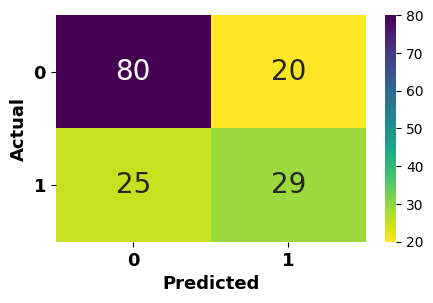

In [23]:
plot_confusion_matrix(y_test, test_pred)

In [24]:
classification_metrics(y_test, test_pred)

,Accuracy,Recall,Precision,F-score
0,0.7078,0.537,0.5918,0.5631


The above results were obtained by considering the default threshold (0.5). The recall values are low and there are noticeable number of patients in both sets whom their diabetes were not identified. Let's see if changing the threshold can improve the model performance and reducing the Type II error. 

### Finding the optimal threshold 
- ROC-AUC curve

In [25]:
train_pred_proba = model.predict_proba(X_train)[:,1] # probabilities of the positive outcome 

fpr, tpr, thresholds = metrics.roc_curve(y_train,  train_pred_proba)
auc = metrics.roc_auc_score(y_train, train_pred_proba)

print('Area Under the Curve (AUC): {}'.format(round(auc,2)))

Area Under the Curve (AUC): 0.84


In [26]:
J = tpr - fpr # Youden’s J statistic
ix = np.argmax(J) 
optim_thresh_1 = thresholds[ix]
print('Optimum threshold: {}'.format(round(optim_thresh_1,4)))

Optimum threshold: 0.2346


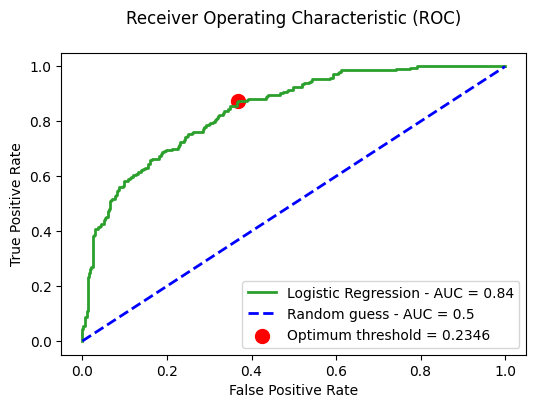

In [27]:
plt.figure(figsize=(6,4), dpi=100)
plt.plot(fpr, tpr, 'tab:green', lw=2, label='Logistic Regression - AUC = %0.2f' % auc) 
plt.plot([0, 1], [0, 1],'b--', lw=2, label='Random guess - AUC = 0.5') # Random guess ~ No prediction
plt.scatter(fpr[ix], tpr[ix], marker='o', color='red', s=100, label='Optimum threshold = %0.4f' % optim_thresh_1)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)\n')
plt.legend(loc='best')
plt.show()

In [28]:
train_pred_1 = model.predict_proba(X_train)[:,1] > optim_thresh_1
test_pred_1 = model.predict_proba(X_test)[:,1] > optim_thresh_1

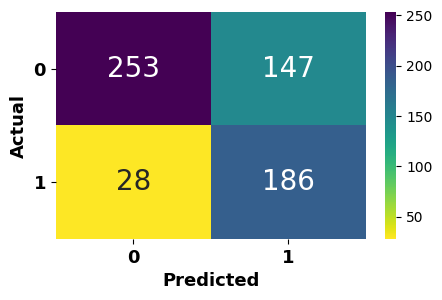

In [29]:
plot_confusion_matrix(y_train, train_pred_1)

In [30]:
classification_metrics(y_train, train_pred_1)

,Accuracy,Recall,Precision,F-score
0,0.715,0.8692,0.5586,0.6801


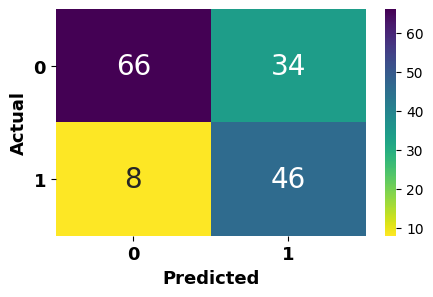

In [31]:
plot_confusion_matrix(y_test, test_pred_1)

In [32]:
classification_metrics(y_test, test_pred_1)

,Accuracy,Recall,Precision,F-score
0,0.7273,0.8519,0.575,0.6866


Changing the threshold using the ROC-AUC curve improved the recall score significantly. Type II error decreased from 89 to 28 in the training set, and from 25 to 8 in the test set.
***
Let's see if the threshold can be improved further.
- F-score vs. threshold

In [33]:
thresholds = np.arange(0.0, 1.0, 0.0001)

f1score = [metrics.f1_score(y_train, train_pred_proba > item) for item in thresholds]  

idx = np.argmax(f1score)
optim_thresh_2 = thresholds[idx]
max_f1score = round(f1score[idx],4)

print('Optimum threshold: {} with F-score: {}'.format(round(optim_thresh_2,4), max_f1score))

Optimum threshold: 0.2322 with F-score: 0.6825


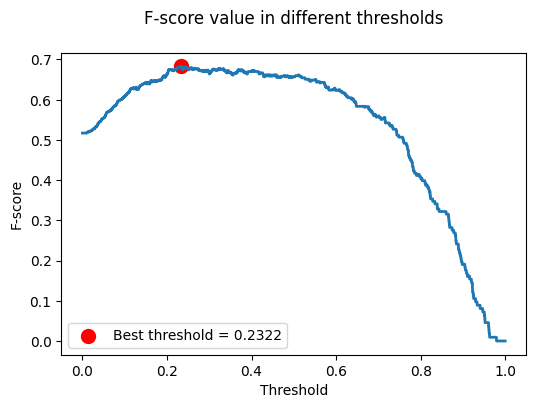

In [34]:
plt.figure(figsize=(6,4), dpi=100)
plt.plot(thresholds, f1score, 'tab:blue', lw=2)
plt.scatter(thresholds[idx], f1score[idx], marker='o', s=100, color='red', label='Best threshold = %0.4f' % optim_thresh_2)
plt.title("F-score value in different thresholds\n")
plt.xlabel('Threshold')
plt.ylabel('F-score')
plt.legend(loc=3)
plt.show()

In [35]:
train_pred_2 = model.predict_proba(X_train)[:,1] > optim_thresh_2
test_pred_2 = model.predict_proba(X_test)[:,1] > optim_thresh_2

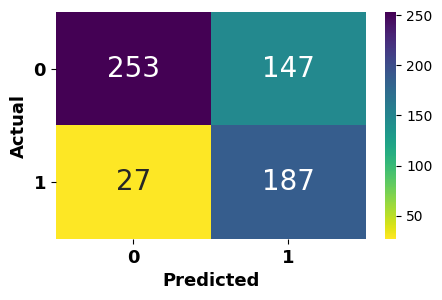

In [36]:
plot_confusion_matrix(y_train, train_pred_2)

In [37]:
classification_metrics(y_train, train_pred_2)

,Accuracy,Recall,Precision,F-score
0,0.7166,0.8738,0.5599,0.6825


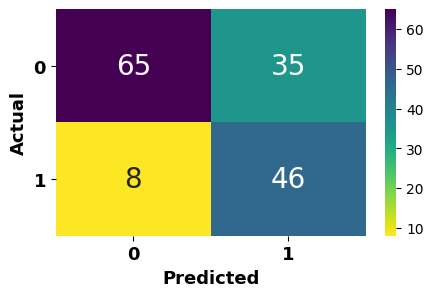

In [38]:
plot_confusion_matrix(y_test, test_pred_2)

In [39]:
classification_metrics(y_test, test_pred_2)

,Accuracy,Recall,Precision,F-score
0,0.7208,0.8519,0.5679,0.6815


Changing the threshold using the `F-score vs. threshold` plot slightly improved the recall score compared to the previous threshold. Type II error decreased from 28 to 27 in the training set while remained constant in the test set.
***
Let's take a look at the models perfromance with different thresholds

In [40]:
training_perfomance_review = pd.concat([classification_metrics(y_train, train_pred).T, 
                                                 classification_metrics(y_train, train_pred_1).T, 
                                                 classification_metrics(y_train, train_pred_2).T], axis=1)

training_perfomance_review.columns = ['Threshold= 0.5', "Threshold= "+str(round(optim_thresh_1,4)), 
                             "Threshold= "+str(round(optim_thresh_2,4))]
training_perfomance_review

,Threshold= 0.5,Threshold= 0.2346,Threshold= 0.2322
Accuracy,0.7866,0.7150,0.7166
Recall,0.5841,0.8692,0.8738
Precision,0.7485,0.5586,0.5599
F-score,0.6562,0.6801,0.6825


In [41]:
test_perfomance_review = pd.concat([classification_metrics(y_test, test_pred).T, 
                                                 classification_metrics(y_test, test_pred_1).T, 
                                                 classification_metrics(y_test, test_pred_2).T], axis=1)

test_perfomance_review.columns = ['Threshold= 0.5', "Threshold= "+str(round(optim_thresh_1,4)), 
                             "Threshold= "+str(round(optim_thresh_2,4))]
test_perfomance_review

,Threshold= 0.5,Threshold= 0.2346,Threshold= 0.2322
Accuracy,0.7078,0.7273,0.7208
Recall,0.5370,0.8519,0.8519
Precision,0.5918,0.5750,0.5679
F-score,0.5631,0.6866,0.6815


According to the above tables, changing the threshold value helped in improving the recall score significantly. The last two models performance are comparable and there's no significant difference. Since the overall test set performance in the second case (threshold=0.2346) is slightly better than the third one (considering Type I error or false positives), we can choose it as the final model. 

Sources:
- https://www.kaggle.com/uciml/pima-indians-diabetes-database
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://machinelearningmastery.com/what-is-imbalanced-classification/
- https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/